In [2]:
%load_ext autoreload
%autoreload 2

import sys, os
import numpy as np
import math
import matplotlib.pyplot as plt

import numpy as np
import scipy as sp
import scipy.sparse as sps
import scipy.sparse.linalg as LAS

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

## Sensitive Cell Type

h =  0.005
D k / h2 =  0.039999999999999994
7.508056286960706
9.955742353837218e-05


Text(0, 0.5, 'concentration(mM)')

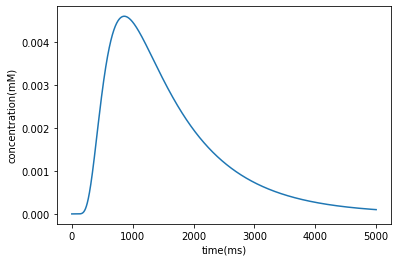

In [3]:
# Setup basic domain
R = 0.1
D = 1e-6

N = 20     # Number of lattice points
h = R / N  # Spatial step size

# Setup final solution time + time-step
tf = 5000
k  = 1
n_steps = round(tf / k)

# Create the x-grid
x = np.linspace(0, tf, n_steps+1)

# Print the stability condition; Recall that this ratio must be less than 1/2
print('h = ', h)
print('D k / h2 = ', (D * k / h**2))

# Create initial condition
w  = np.zeros(N + 1)
sol = np.zeros(n_steps + 1)

# Set initial condition
w[N] = 10
Pgp = 0.01

for j in range(n_steps):
    u = w
    for i in range(1, N+1):
        d1 = (D * k / h**2) * np.ones(N)
        d2 = ((D * k / h**2) * (-2 - 2 / i) + 1)  * np.ones(N+1)
        d3 = ((D * k / h**2) * (1 + 2/i)) * np.ones(N)
        A = sps.diags((d1, d2, d3), offsets=(-1, 0, 1))
        w[i-1] = (A.dot(u))[i-1]
        
    w[i-1] = w[i-1] - Pgp*w[i-1]
        
    # enforce BC
    w[N] = 0
    w[0] = w[1]
    sol[j+1] = w[0]

total = sum(sol)
print(total)
print(sol[n_steps])
plt.plot(x, sol)
plt.xlabel("time(ms)")
plt.ylabel("concentration(mM)")

## Resistant Cell Type

h =  0.005
D k / h2 =  0.039999999999999994
2.62770347755524
2.7909105842630792e-05


Text(0, 0.5, 'concentration(mM)')

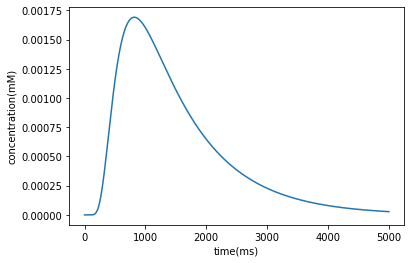

In [4]:
# Setup basic domain
R = 0.1
D = 1e-6

N = 20     # Number of lattice points
h = R / N  # Spatial step size

# Setup final solution time + time-step
tf = 5000
k  = 1
n_steps = round(tf / k)

# Create the x-grid
x = np.linspace(0, tf, n_steps+1)

# Print the stability condition; Recall that this ratio must be less than 1/2
print('h = ', h)
print('D k / h2 = ', (D * k / h**2))

# Create initial condition
w  = np.zeros(N + 1)
sol = np.zeros(n_steps + 1)

# Set initial condition
w[N] = 10
Pgp = 0.1

for j in range(n_steps):
    u = w
    for i in range(1, N+1):
        d1 = (D * k / h**2) * np.ones(N)
        d2 = ((D * k / h**2) * (-2 - 2 / i) + 1)  * np.ones(N+1)
        d3 = ((D * k / h**2) * (1 + 2/i)) * np.ones(N)
        A = sps.diags((d1, d2, d3), offsets=(-1, 0, 1))
        w[i-1] = (A.dot(u))[i-1]
        
    w[i-1] = w[i-1] - Pgp*w[i-1]
        
    # enforce BC
    w[N] = 0
    w[0] = w[1]
    sol[j+1] = w[0]

total = sum(sol)
print(total)
print(sol[n_steps])
plt.plot(x, sol)
plt.xlabel("time(ms)")
plt.ylabel("concentration(mM)")

## Sensitive vs. Resistant Cell population

In [5]:
def destruct(x,sig,miu):
    u = 1/(sig*np.sqrt(2*np.pi))*math.exp(-0.5*((x-miu)/sig)**2)

    return u

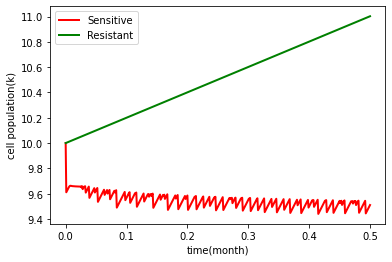

In [16]:
# model parameters
r_1 = 1; r_2 = 2; d_1 = 0.8; d_2 = 0.2; b = 0.5;
dt = 0.001; max_time = 0.5

# initial time and populations
t = 0; x = 10; y = 10

# empty lists in which to store time and populations
t_list = []; x_list = []; y_list = []

# initialize lists
t_list.append(t); x_list.append(x); y_list.append(y)

while t < max_time:
    # calc new values for t, x, y
    t = t + dt
    x = x + r_1*x*dt - destruct(x, max(np.var(x_list),1e-3), sum(x_list)/len(x_list))*dt
    y = y + (b*(destruct(x, max(np.var(x_list),1e-3), sum(x_list)/len(x_list))*dt) + r_2)*dt 
    - destruct(y, max(np.var(y_list),1e-3), sum(y_list)/len(y_list))*dt
    
    if (x < 0):
        x = 0

    # store new values in lists
    t_list.append(t)
    x_list.append(x)
    y_list.append(y)

# Plot the results    
p = plt.plot(t_list, x_list, 'r', t_list, y_list, 'g', linewidth = 2)
plt.xlabel("time(month)")
plt.ylabel("cell population(k)")
plt.legend(['Sensitive', 'Resistant'])

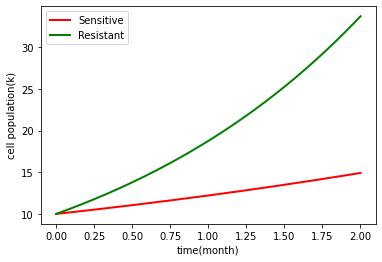

In [12]:
# model parameters
r_1 = 1; r_2 = 1; d_1 = 0.8; d_2 = 0.5; b = 0.2;
dt = 0.001; max_time = 2

# initial time and populations
t = 0; x = 10; y = 10

# empty lists in which to store time and populations
t_list = []; x_list = []; y_list = []

# initialize lists
t_list.append(t); x_list.append(x); y_list.append(y)

while t < max_time:
    # calc new values for t, x, y
    t = t + dt
    x = x + (r_1-d_1)*x*dt
    y = y + b*d_1*x*dt + (r_2-d_2)*y*dt
    
    # store new values in lists
    t_list.append(t)
    x_list.append(x)
    y_list.append(y)

# Plot the results    
p = plt.plot(t_list, x_list, 'r', t_list, y_list, 'g', linewidth = 2)
plt.xlabel("time(month)")
plt.ylabel("cell population(k)")
plt.legend(['Sensitive', 'Resistant'])